<a href="https://colab.research.google.com/github/lancedsouza/DataScience/blob/main/Breast_Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X.shape


(569, 30)

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Step 2: Load the Dataset

In [ ]:
cancer = load_breast_cancer()
# Convert to DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target


Step 3: Understand the Dataset

In [ ]:
# Basic Info
print(df.shape)           # Dimensions
print(df.columns)         # Column names
print(df['target'].unique())  # Target classes: 0 = malignant, 1 = benign
print(df['target'].value_counts())  # Class distribution

# Description
print(df.describe())


(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
[0 1]
target
1    357
0    212
Name: count, dtype: int64
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.91412

Step 4: Check for Missing Values

In [ ]:
print(df.isnull().sum())


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


Step 5: Visualize Target Distribution

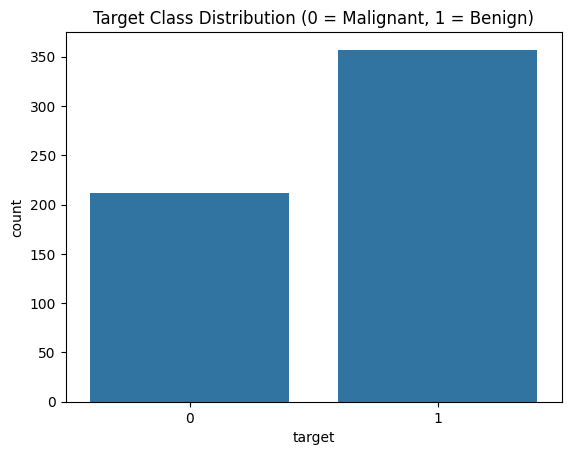

In [ ]:
sns.countplot(data=df, x='target')
plt.title('Target Class Distribution (0 = Malignant, 1 = Benign)')
plt.show()


Step 6: Correlation Heatmap
Use this to identify multicollinearity or redundant features.

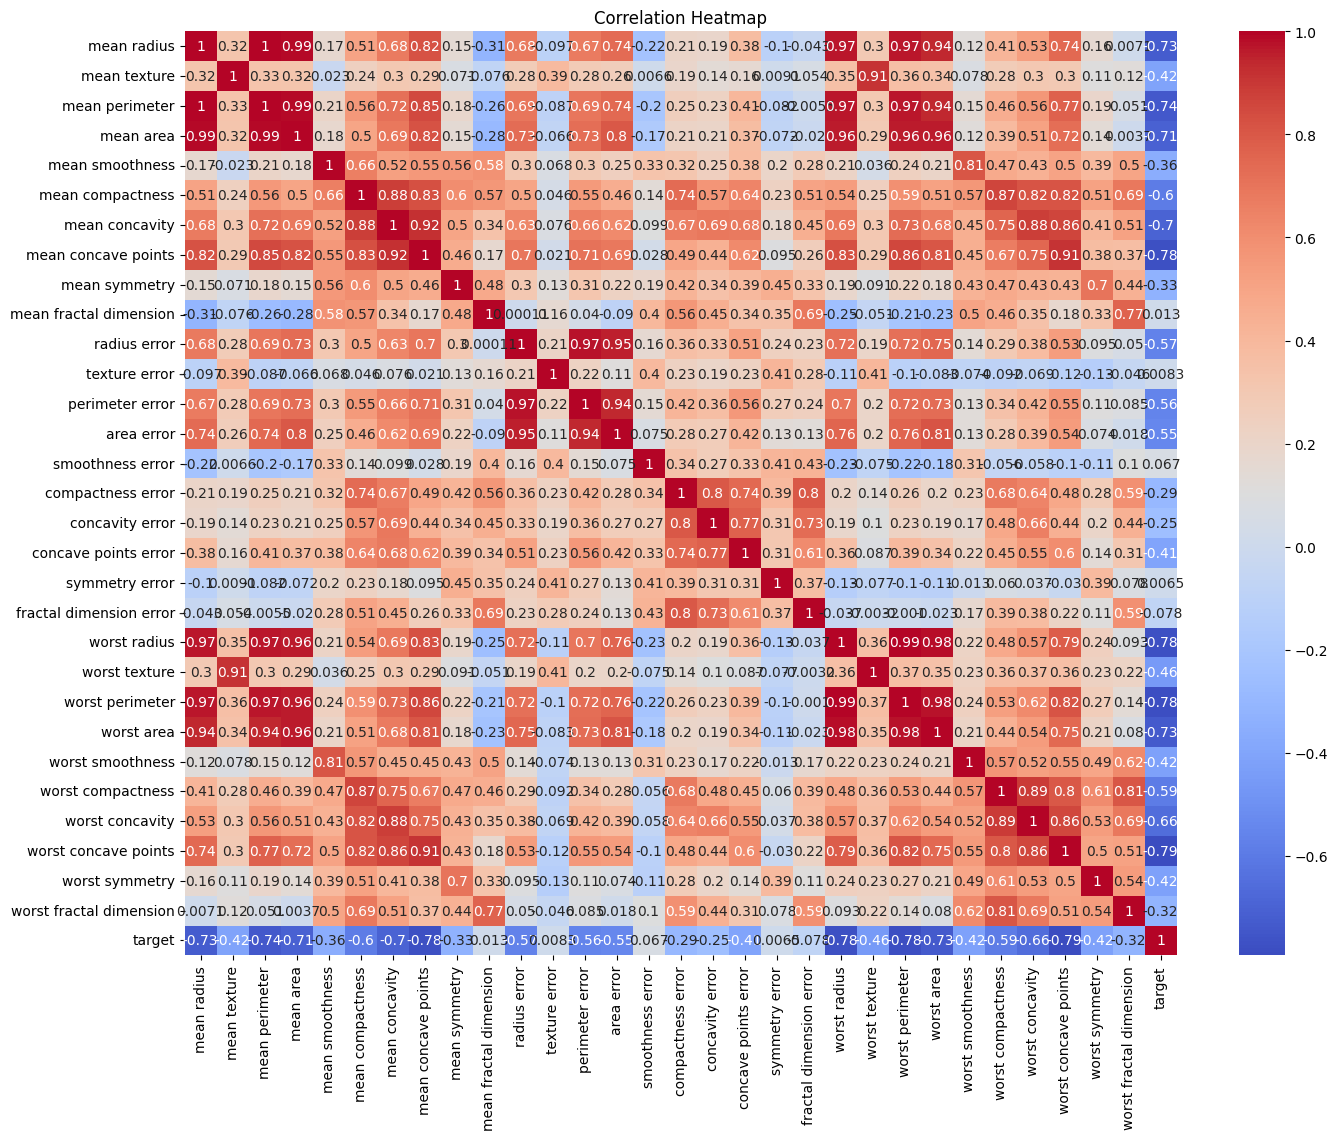

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.corr().abs()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


 What Is Multicollinearity?
Imagine you're in class, and you ask 10 friends the same question:

"How tall is the giraffe?"

Now, 2 of your friends always give the same answer (or very, very close). That means:

🧑‍🤝‍🧑 Those 2 friends are “too similar” — maybe one is just copying the other.

In data science, this is called multicollinearity.

👉 When 2 or more features (columns) in your dataset are highly related (correlated), it becomes hard for your model to decide who’s responsible for what.

🎯 Why Is It a Problem?
If your model gets the same info from multiple columns, it:

Gets confused

May become unstable

Performs poorly

Overfits

🧪 How to Detect It? → Use a Heatmap
A heatmap is a colorful table where:

Each cell shows how similar 2 features are

It uses a metric called correlation

+1 = perfectly similar

0 = not related

-1 = perfectly opposite

How to Read the Heatmap?
Look at the bright red or dark blue squares.

If a square is very close to +1 or -1, it means:

The two features are very similar or very opposite → high multicollinearity.

Step 7: Boxplots for Feature Distribution

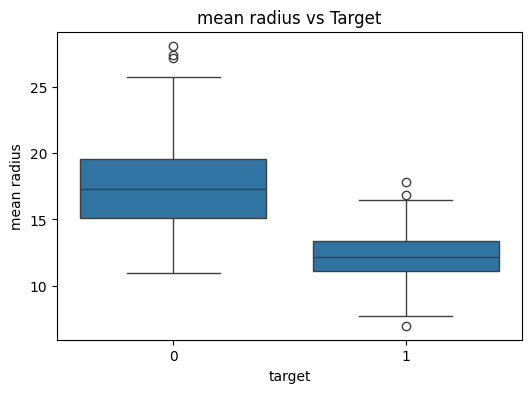

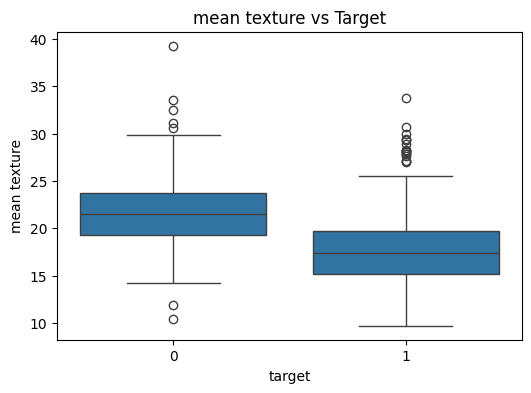

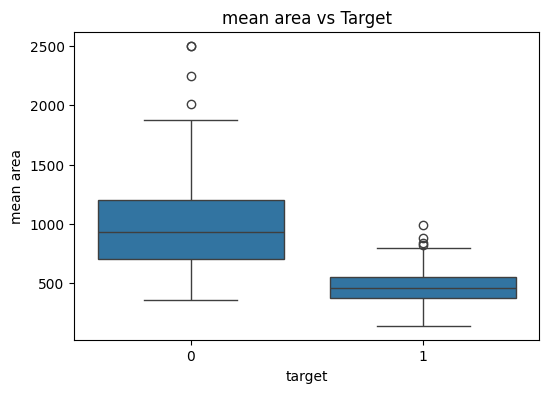

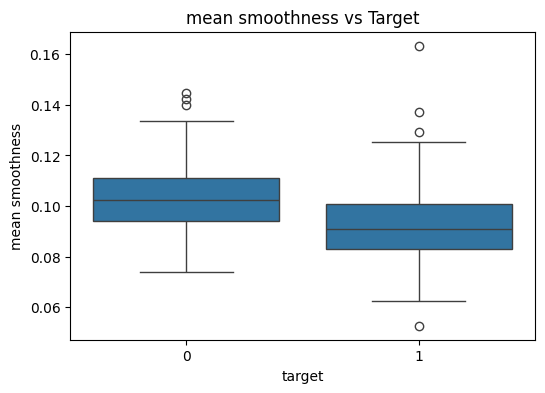

In [ ]:
# Plot few key features
features_to_plot = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
    plt.show()


Step 8: Pairplot of Selected Features

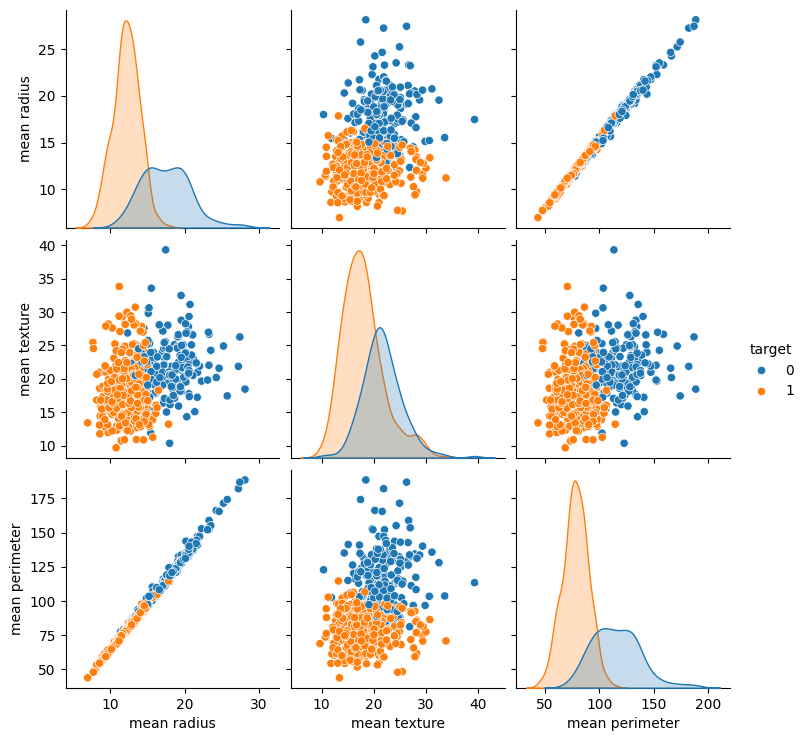

In [ ]:
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'target']], hue='target')
plt.show()


✅ Step 9: Distribution Plots

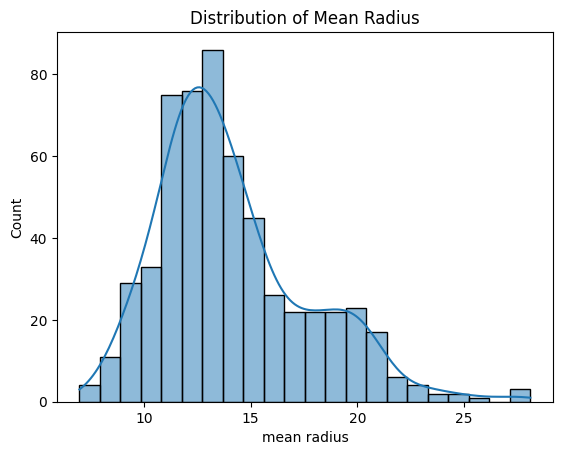

In [ ]:
# Distribution of mean radius
sns.histplot(df['mean radius'], kde=True)
plt.title('Distribution of Mean Radius')
plt.show()


Feature Engineering


In [19]:
cor = df.corr()
target_cor = cor["target"].drop("target")  # remove target vs. itself
target_cor_sorted = target_cor.abs().sort_values(ascending=False)

print("Top features most correlated with target:\n")
print(target_cor_sorted.head(10))


Top features most correlated with target:

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: target, dtype: float64


 STEP 5: Drop Multicollinear Features

In [21]:
selected_features = target_cor_sorted[target_cor_sorted > 0.2].index.tolist()
corr_matrix = df[selected_features].corr().abs()

# Keep upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
final_features = list(set(selected_features) - set(to_drop))


 STEP 6: Scale the Features
This is especially important for Logistic Regression, SVM, and KNN.

In [22]:
from sklearn.preprocessing import StandardScaler

X = df[final_features]
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
# 60% train, 20% val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [ ]:
X_temp,X_test,y_temp,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_temp,y_temp,test_size=0.25,random_state=42)


In [ ]:
X_temp.shape,X_train.shape,X_val.shape,X_test.shape

((455, 30), (341, 30), (114, 30), (114, 30))

Step 6: GridSearchCV + Cross-Validation on Train Set

In [24]:
log_model = LogisticRegression(max_iter=10000)
log_params = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(log_model, log_params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Cross-validated train score:", grid.best_score_)


Best Params: {'C': 100}
Cross-validated train score: 0.9707161125319693


 Step 7: Evaluate on Validation and Test Sets

In [25]:
# Validation performance
val_pred = grid.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Validation Report:\n", classification_report(y_val, val_pred))

# Final Test performance
test_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Test Report:\n", classification_report(y_test, test_pred))


Validation Accuracy: 0.9649122807017544
Validation Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.97      0.97      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Test Accuracy: 0.9736842105263158
Test Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



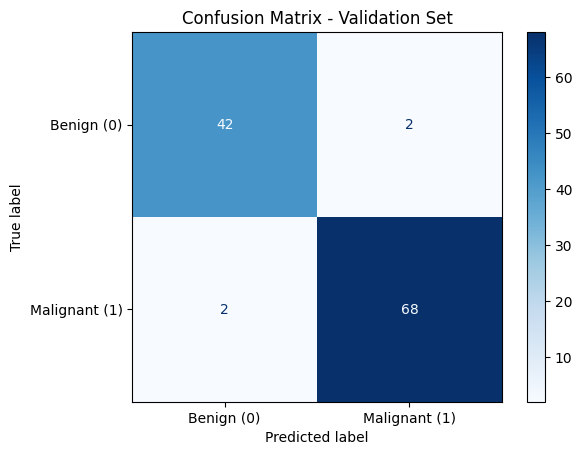

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# On validation data
cm = confusion_matrix(y_val, val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign (0)", "Malignant (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Set")
plt.show()


 Cross-Validation Scores vs. C (Hyperparameter Tuning Plot)

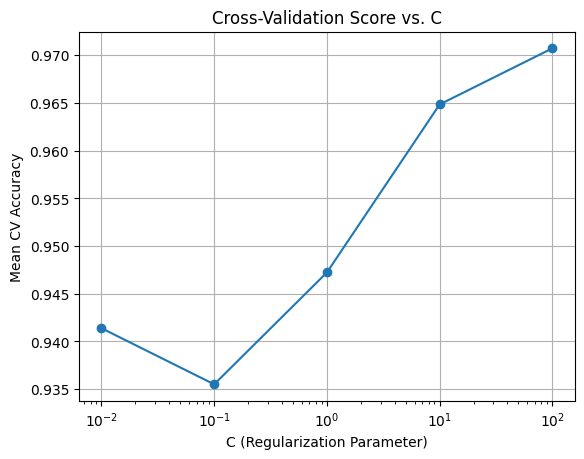

In [27]:
import matplotlib.pyplot as plt

# Plot mean cross-val scores
C_values = log_params['C']
mean_scores = grid.cv_results_['mean_test_score']

plt.plot(C_values, mean_scores, marker='o')
plt.xscale('log')  # Because C is on a logarithmic scale
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean CV Accuracy')
plt.title('Cross-Validation Score vs. C')
plt.grid(True)
plt.show()


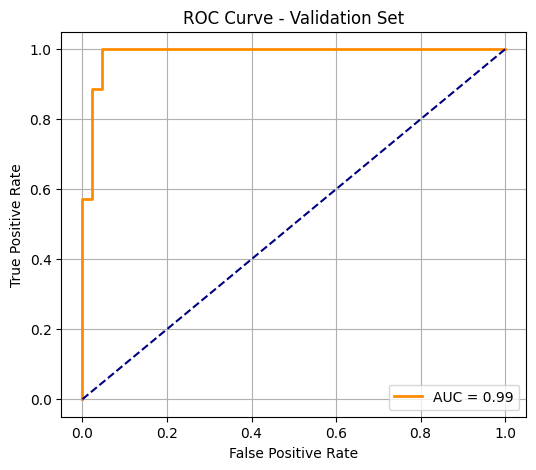

In [28]:
from sklearn.metrics import roc_curve, auc

y_val_probs = grid.predict_proba(X_val)[:, 1]  # probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Validation Set")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Step 2: Build Neural Network (Keras)

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # input layer
    layers.Dense(32, activation='relu'),      # hidden layer 1
    layers.Dense(16, activation='relu'),      # hidden layer 2
    layers.Dense(1, activation='sigmoid')     # output layer (probability of cancer)
])


In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Step 4: Train the Model

In [34]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=16,
                    verbose=1)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3044 - loss: 1.3864 - val_accuracy: 0.3509 - val_loss: 1.0523
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3327 - loss: 0.9988 - val_accuracy: 0.4474 - val_loss: 0.8115
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4548 - loss: 0.7530 - val_accuracy: 0.6579 - val_loss: 0.6612
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5915 - loss: 0.6653 - val_accuracy: 0.6140 - val_loss: 0.6770
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6027 - loss: 0.6928 - val_accuracy: 0.5175 - val_loss: 0.7228
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5885 - loss: 0.6769 - val_accuracy: 0.7632 - val_loss: 0.5711
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7617 - loss: 0.5527 - val_accuracy: 0.6754 - val_loss: 0.5648
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7292 - loss: 0.5442 - val_accuracy: 0.7632 - val_loss

 Step 5: Plot Training History (Loss + Accuracy)

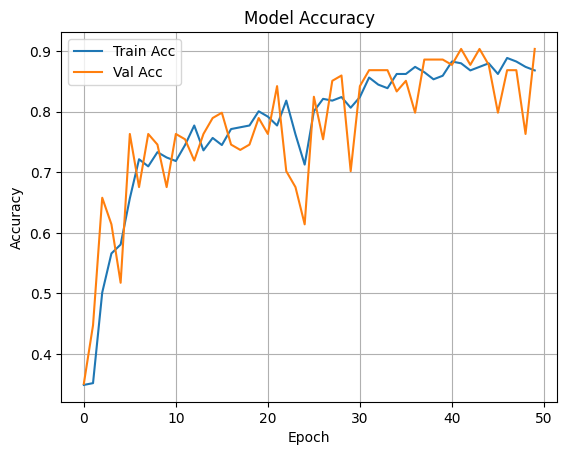

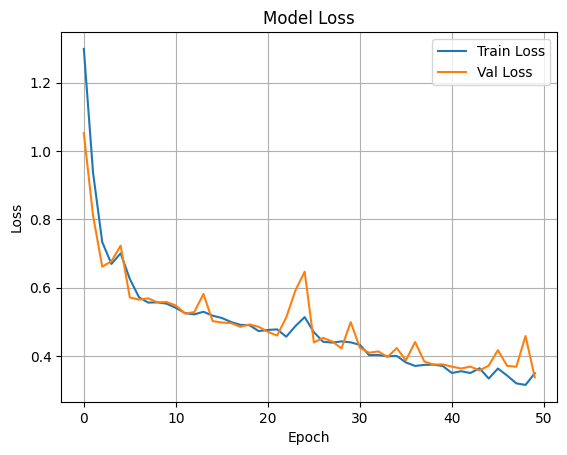

In [35]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities and round to 0 or 1
y_pred_probs = model.predict(X_test).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


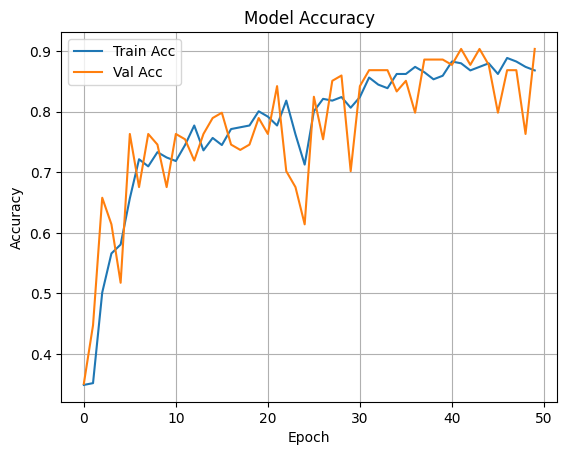

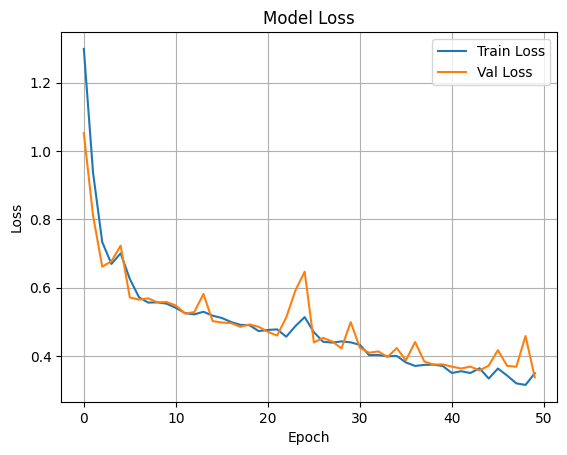

In [38]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities and round to 0 or 1
y_pred_probs = model.predict(X_test).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Accuracy: 0.9035087823867798
[[32 11]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        43
           1       0.87      1.00      0.93        71

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



Step 6: Evaluate on Test Set

ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.grid(True)
plt.show()
